### **Dataset analysis with Kaggle.com**

#### We use data from the Top 50 best-selling books on Amazon for 11 years (from 2009 to 2019).
[LINK](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file (use the "read_csv" function)

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

#### Print the first five lines (use the "head" function)

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### Print the dimensions of the dataset (use the "shape" attribute)

In [4]:
df.shape

(550, 7)

#### _How many books does the dataset store data about?_

In [5]:
unique_book_count = df['Name'].nunique()
unique_book_count

351

##### **Answer:** 351

#### Change the case to lowercase and replace the space with a lowercase underscore (snake_style)

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

### **Primary data research**

#### Check if all the rows have enough data: print the number of blanks (na) in each column (use the "isna" and "sum" functions)

In [7]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

#### _Do any variables have missing values? (Yes / No)_

##### **Answer:** no

#### Check for unique values in the genre column (use the "unique" function)
#### _What are the unique genres?_

In [8]:
pd.unique(df['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

##### **Answer:** Non Fiction, Fiction

#### Now look at the price distribution: build a chart (use kind='hist')
#### Determine what is the maximum, minimum, average, median price (use the max, min, mean, median functions)

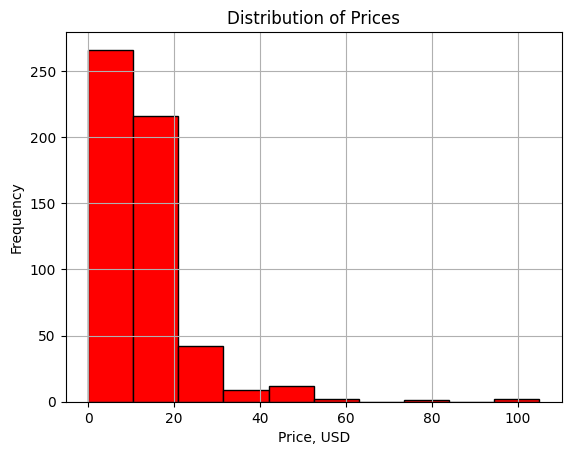

In [9]:
df['price'].plot(kind='hist', bins=10, color='red', edgecolor='black')

plt.title('Distribution of Prices')
plt.xlabel('Price, USD')
plt.ylabel('Frequency')
plt.grid()

plt.show()

In [10]:
print(f"Min price: {df['price'].min()}")
print(f"Max price: {df['price'].max()}")
print(f"Average price: {df['price'].mean()}")
print(f"Median price: {df['price'].median()}")

Min price: 0
Max price: 105
Average price: 13.1
Median price: 11.0


#### _Minimum price ?_

##### **Answer:** 0

#### _Maximum price ?_

##### **Answer:** 105

#### _Average price?_

##### **Answer:** 13.1

#### _Median price?_

##### **Answer:** 11.0

### **Search and sort data**

#### _What is the highest rating in the dataset?_

In [11]:
max_rating = df["user_rating"].max()
max_rating

4.9

##### **Answer:** 4.9

#### _How many books have this rating?_

In [12]:
is_highest_rating = df["user_rating"] == max_rating
is_highest_rating.sum()

52

##### **Answer:** 52

#### _Which book has the most reviews?_

In [13]:
max_reviews = df["reviews"].max()
df[df["reviews"] == max_reviews]
# max_reviews_indices = df.index[df['reviews'] == df["reviews"].max()].tolist()
# df.loc[max_reviews_indices]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


##### **Answer:** Book with title - "Where the Crawdads Sing"

#### _Of the books in the Top 50 in 2015, which is the most expensive (you can use an intermediate date frame)?_

In [14]:
top_50_2015 = df[(df['year'] == 2015)].nlargest(50, 'user_rating')
most_expensive_book = top_50_2015[top_50_2015["price"] == top_50_2015["price"].max()]
most_expensive_book

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


##### **Answer:** Book with title - "Publication Manual of the American Psychologic..."

#### _How many books of the Fiction genre were in the Top 50 in 2010 (use &)?_

In [15]:
top_50_2010 = df[(df['year'] == 2010) & (df["genre"] == "Fiction")].nlargest(50, 'user_rating')
len(top_50_2010)

# top_50_2010 = df[df['year'] == 2010].nlargest(50, 'user_rating')
# top_50_2010_fiction = top_50_2010["genre"] == "Fiction"
# top_50_2010_fiction.sum()

20

##### **Answer:** 20 books

#### _How many books with a 4.9 rating were ranked in 2010 and 2011 (use "|" or the "isin" function)?_

In [16]:
# books = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
books = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
books.shape[0]

1

##### **Answer:** 1 book

#### _And finally, let's sort by ascending price all the books that made it into the ranking in 2015 and cost less than $8 (use the "sort_values" function)_

In [17]:
books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
# books_2015_sorted = books_2015
books_2015

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


#### _What is the last book in the sorted list?_

In [18]:
books_2015.iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

##### **Answer:** Book with name "Old School (Diary of a Wimpy Kid #10)"

### **Aggregate data and join tables**

#### Let's look at the maximum and minimum prices for each genre (use the "groupby" and "agg" functions, and use "max" and "min" to calculate the minimum and maximum values). Don't select all columns, just the ones you need

In [19]:
grouped_by_genre = df.groupby("genre", as_index=False)
aggregated_prices = grouped_by_genre["price"].agg(["max", "min"])
aggregated_prices

,genre,max,min
0,Fiction,82,0
1,Non Fiction,105,0


#### _The maximum price for the Fiction genre:_

##### **Answer:** 82

#### _The minimum price for the Fiction genre:_

##### **Answer:** 0

#### _The maximum price for the Non Fiction genre:_

##### **Answer:** 105

#### _The minimum price for the Non Fiction genre:_

##### **Answer:** 0

#### Now create a new dataframe that will contain the number of books for each author (use the "groupby" and "agg" functions, and use "count" to count the number). Do not take all columns, select only the necessary ones

In [20]:
grouped_by_auhtor = df.groupby("author", as_index=False)
aggregated_authors = grouped_by_auhtor["name"].agg(["count"])
# pd.set_option('display.max_rows', None)
print(aggregated_authors)
# pd.reset_option('display.max_rows')

                         author  count
0              Abraham Verghese      2
1                Adam Gasiewski      1
2                 Adam Mansbach      1
3                     Adir Levy      1
4    Admiral William H. McRaven      1
..                          ...    ...
243             Walter Isaacson      3
244               William Davis      2
245            William P. Young      2
246            Wizards RPG Team      3
247                Zhi Gang Sha      2

[248 rows x 2 columns]


#### _What is the dimension of the table?_

In [21]:
aggregated_authors.shape

(248, 2)

##### **Answer:** 248 rows × 2 columns

#### _Which author has the most books?_

In [22]:
max_count_index = aggregated_authors['count'].idxmax()
author_with_most_books = aggregated_authors.loc[max_count_index, 'author']
author_with_most_books

'Jeff Kinney'

##### **Answer:** 'Jeff Kinney'

#### _How many books are there by this author?_

In [23]:
author_with_most_books = aggregated_authors.loc[max_count_index, 'count']
author_with_most_books

12

##### **Answer:** 12

#### Now create a second dataframe that will contain the average rating for each author (use the "groupby" and "agg" functions, and use "mean" to calculate the average). Do not take all columns, select only the necessary ones

In [24]:
aggregated_authors_mean = grouped_by_auhtor["user_rating"].agg(["mean"])
# aggregated_authors_mean = grouped_by_auhtor["user_rating"].agg(["mean"]).rename(columns={"mean": "mean_rating"})
# aggregated_authors_mean = grouped_by_auhtor["user_rating"].agg([lambda x: round(x.mean(), 2)])
aggregated_authors_mean["mean"] = aggregated_authors_mean["mean"].round(2)
aggregated_authors_mean

,author,mean
0,Abraham Verghese,4.60
1,Adam Gasiewski,4.40
2,Adam Mansbach,4.80
3,Adir Levy,4.80
4,Admiral William H. McRaven,4.70
...,...,...
243,Walter Isaacson,4.57
244,William Davis,4.40
245,William P. Young,4.60
246,Wizards RPG Team,4.80


#### _Which author has the lowest average rating?_

In [25]:
min_rating_index = aggregated_authors_mean['mean'].idxmin()

In [26]:
author_with_lowest_rating = aggregated_authors_mean.loc[min_rating_index, 'author']
author_with_lowest_rating

'Donna Tartt'

##### **Answer:** "Donna Tartt"

#### _What is the average rating of this author?_

In [27]:
author_avg_rating = aggregated_authors_mean.loc[min_rating_index, 'mean']
author_avg_rating

3.9

##### **Answer:** 3.9

#### Combine the last two dataframes so that you can see the number of books and the average rating for each author (use the "concat" function with "axis=1"). Save the result to a variable

In [28]:
combined_df = pd.concat([aggregated_authors.set_index("author"), aggregated_authors_mean.set_index("author")], axis=1).reset_index()
combined_df

,author,count,mean
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.57
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80


#### Sort the dataframe by increasing number of books and increasing rating (use the "sort_values" function)

In [29]:
combined_df = combined_df.sort_values(by=["count", "mean"], ascending=[True, True])
# combined_df.sort_values(by=["mean", "count"], ascending=[True, True])
combined_df

,author,count,mean
171,Muriel Barbery,1,4.00
43,Chris Cleave,1,4.10
109,Ian K. Smith M.D.,1,4.10
186,Pierre Dukan,1,4.10
81,Elizabeth Strout,1,4.20
...,...,...,...
11,American Psychological Association,10,4.50
226,Suzanne Collins,11,4.66
92,Gary Chapman,11,4.74
197,Rick Riordan,11,4.77


#### _Which author is first on the list?_

In [30]:
print(combined_df.iloc[0]['author'])
print(combined_df.loc[0]['author'])

Muriel Barbery
Abraham Verghese


##### **Answer:** Muriel Barbery

## **Visualization**

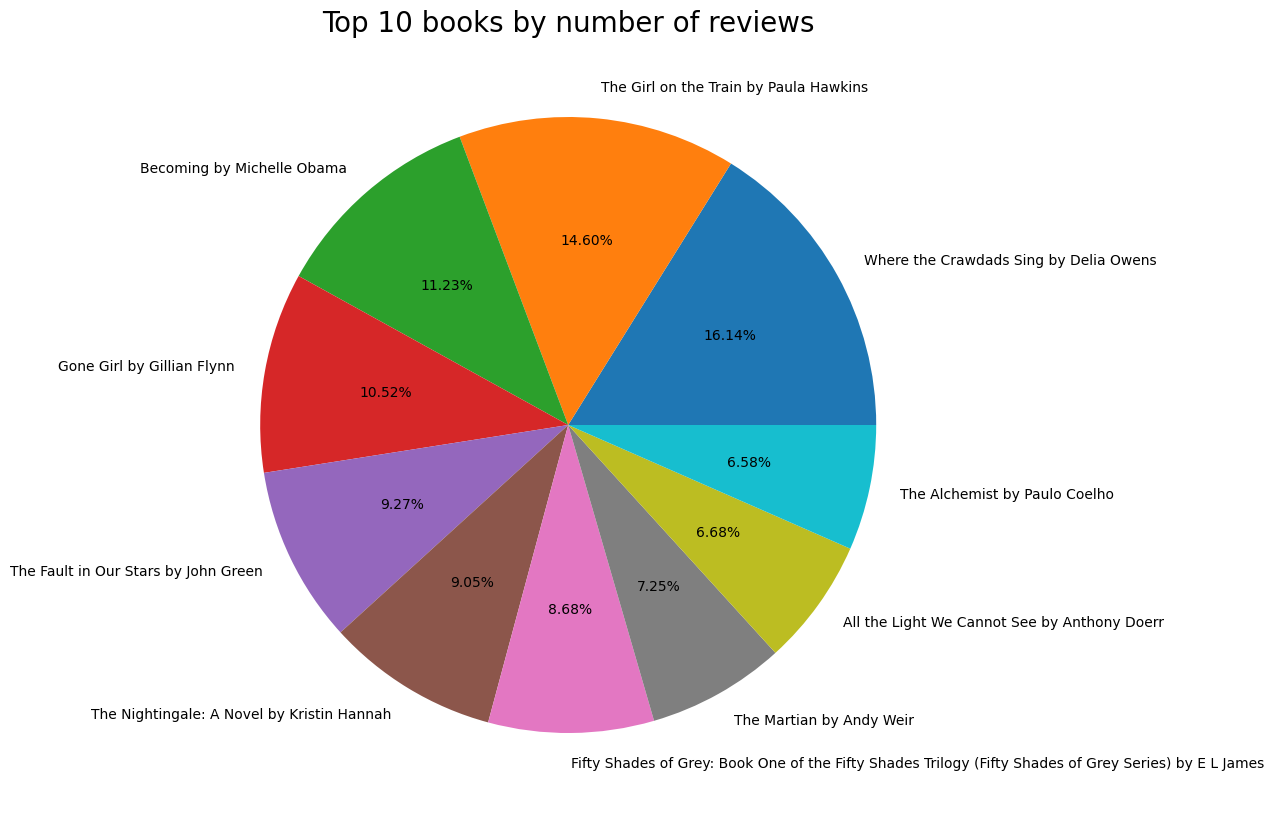

In [31]:
unique_name_books = df.drop_duplicates(subset=['name'])
best_sellings = unique_name_books.nlargest(10, 'reviews')

plt.figure(figsize=(10, 10))
plt.pie(best_sellings['reviews'],
        labels=best_sellings['name'] + ' by ' + best_sellings['author'], 
        autopct='%1.2f%%')
plt.title('Top 10 books by number of reviews', fontsize=20)
plt.show()

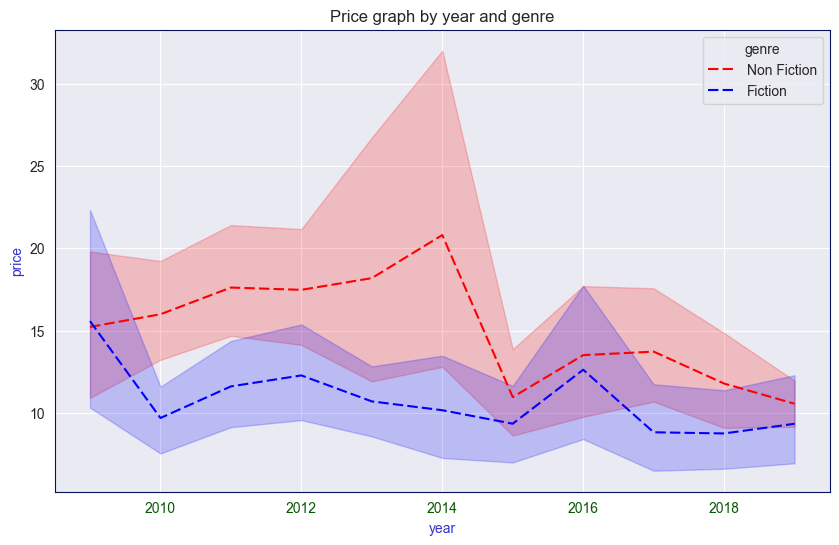

In [32]:
sns.set_style("darkgrid",  {'axes.labelcolor':"(0.2,0.2,0.8)", 'axes.edgecolor':'#061358',
'xtick.color':'#0A5806'})
plt.figure(figsize=(10, 6))
plt.title('Price graph by year and genre')
sns.lineplot(x='year', 
             y='price', 
             hue="genre", 
             palette=["red", "blue"],
             dashes=[5, 2],
             data=df)
plt.show()